<h1><center>
Capstone 1 Project Airbnb Berlin:
</center> </h>

<h2><center>
Hypothesis
</h>

<h3>

The hypothesis for this is that summer time travel will be the most expensive time to travel to Berlin each year based on 2 datasets from kaggle concerning the Airbnb of Berlin. The hypothesis is, like many destinations summer will be the most expensive time to travel. This project will also show the most busy time of year to travel so as give a recommendation on when it is the most crowded.
Although there are multiple variables in this dataset, the focus will be strictly on:
- 'entire home - 1 bedroom' 
- 'entire home - 3 or more bedroom'

The testing will be this by labeling the seasons as follows: 
*   dates between 2/28 - 5/31 will be spring
*   dates between 6/01 - 8/31 will be summer
*   dates between 9/01 - 11/30 will be fall
*   dates between 12/01 - 2/27 will be winter

</center></h3>



In [ ]:
%matplotlib inline
import pandas as pd
import requests
from io import StringIO
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import datetime
import matplotlib.dates as mdates
from decimal import Decimal
#pd.options.display.float_format = '{:,.0e}'.format
#pd.reset_option('display.float_format')
#pd.set_option('display.precision',3)
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Preparation
Since this will only focus on one year of information, the data needs to be structure in seasons, so this will add a "season" column. 

In [ ]:
df = pd.read_csv("/content/drive/My Drive/calendar_summary.csv")
df.head()

print(df.columns)

df['available'] = df['available'].astype('str')
df.fillna('TBD', inplace=True)
df.info()


Index(['listing_id', 'date', 'available', 'price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 251.2+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])
NaN = np.nan
df["season"] = NaN

In [ ]:
fall = pd.date_range(start= '2018-11-07', end ='2018-12-01', freq='D')

fall_start_date = '2018-11-07'
fall_end_date = '2018-12-01'

mask = (df['date'] >= fall_start_date ) & (df['date'] <= fall_end_date )
mask = df.loc[mask]
mask["season"].fillna("fall", inplace = True)
mask.to_csv('fall.csv')
mask.head(5)
mask.info()
mask['available'].value_counts()

fall.astype(str).astype(float)
fall

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 563794 entries, 651 to 8231479
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  563794 non-null  int64         
 1   date        563794 non-null  datetime64[ns]
 2   available   563794 non-null  object        
 3   price       563794 non-null  object        
 4   season      563794 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 25.8+ MB


TypeError: ignored

In [ ]:
fall2 = pd.date_range(start= '2019-09-02', end ='2019-11-06', freq='D')

fall_start_date = '2019-09-02'
fall_end_date = '2019-11-06'

mask2 = (df['date'] >= fall_start_date ) & (df['date'] <= fall_end_date )
mask2 = df.loc[mask2]
mask2["season"].fillna("fall", inplace = True)
mask2.to_csv('fall2.csv')
mask2.head(5)
mask2.info()
mask2['available'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488432 entries, 0 to 8231344
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1488432 non-null  int64         
 1   date        1488432 non-null  datetime64[ns]
 2   available   1488432 non-null  object        
 3   price       1488432 non-null  object        
 4   season      1488432 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 68.1+ MB


f    1174491
t     313941
Name: available, dtype: int64

In [ ]:
spring = pd.date_range(start='2019-02-28', end ='2019-06-01', freq='D')

spring_start_date = '2019-02-28'
spring_end_date = '2019-06-01'

mask3 = (df['date'] >= spring_start_date ) & (df['date'] <= spring_end_date )
mask3 = df.loc[mask3]
mask3["season"].fillna("spring", inplace = True)
mask3.to_csv('spring.csv')
mask3.head(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,listing_id,date,available,price,season
101,2015,2019-06-01,f,TBD,spring
102,2015,2019-05-31,f,TBD,spring
103,2015,2019-05-30,f,TBD,spring
104,2015,2019-05-29,f,TBD,spring
105,2015,2019-05-28,f,TBD,spring


In [ ]:
summer = pd.date_range(start='2019-06-02', end ='2019-09-01', freq='D')

summer_start_date = '2019-06-02'
summer_end_date = '2019-09-01'

mask4 = (df['date'] >= summer_start_date ) & (df['date'] <= summer_end_date )
mask4 = df.loc[mask4]
mask4["season"].fillna("summer", inplace = True)
mask4.to_csv('summer.csv')
mask4.head(5)
mask4.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074784 entries, 9 to 8231254
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
 4   season      object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 95.0+ MB


In [ ]:
winter = pd.date_range(start='2018-12-02', end ='2018-12-31', freq='D')

winter_start_date = '2018-12-02'
winter_end_date = '2018-12-31'

mask5 = (df['date'] >= winter_start_date ) & (df['date'] <= winter_end_date )
mask5 = df.loc[mask5]
mask5["season"].fillna("winter", inplace = True)
mask5.to_csv('winter.csv')
mask5.head(5)
mask5.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 676560 entries, 253 to 8231454
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  676560 non-null  int64         
 1   date        676560 non-null  datetime64[ns]
 2   available   676560 non-null  object        
 3   price       676560 non-null  object        
 4   season      676560 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 31.0+ MB


In [ ]:
winter2 = pd.date_range(start='2019-01-01', end ='2019-02-27', freq='D')

winter2_start_date = '2019-01-01'
winter2_end_date = '2019-02-27'

mask6 = (df['date'] >= winter2_start_date ) & (df['date'] <= winter2_end_date )
mask6 = df.loc[mask6]
mask6["season"].fillna("winter", inplace = True)
mask6.to_csv('winter2.csv')
mask6.head(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,listing_id,date,available,price,season
195,2015,2019-02-27,t,$76.00,winter
196,2015,2019-02-26,t,$76.00,winter
197,2015,2019-02-25,t,$76.00,winter
198,2015,2019-02-24,t,$76.00,winter
199,2015,2019-02-23,t,$77.00,winter


This prepares the previous cells to merge into a new csv to be saved, this way the workspace will be cleaner in order to concat.
---



In [ ]:
import os
cwd = os.getcwd() 
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(cwd) if isfile(join(cwd, f))]

print(cwd)
print(onlyfiles)

/content
['fall2.csv', 'summer.csv', 'winter2.csv', 'spring.csv', 'fall.csv', 'winter.csv']


In [ ]:
import os
cwd = os.getcwd() 

files = [file for file in os.listdir(cwd)]

data = pd.DataFrame()

for file in files:
    if "drive" in file or ".config" in file or "sample_data" in file:
      continue
    filePath = cwd + "/" + file
    #print(filePath)
    df1 = pd.read_csv(filePath)
    print("shape of current season: ", df.shape)
    #print(df.head())
    data = pd.concat([data,df1])
    
data.to_csv("seasons2.csv", index=False)


airbnb_cal = pd.read_csv(cwd + "/seasons2.csv")

print(airbnb_cal.head())
print(airbnb_cal.shape)
print(airbnb_cal.columns)

shape of current season:  (8231480, 5)
shape of current season:  (8231480, 5)
shape of current season:  (8231480, 5)
shape of current season:  (8231480, 5)
shape of current season:  (8231480, 5)
shape of current season:  (8231480, 5)
shape of current season:  (8231480, 5)
   Unnamed: 0  listing_id        date available price season
0           0        2015  2019-09-10         f   TBD   fall
1           1        2015  2019-09-09         f   TBD   fall
2           2        2015  2019-09-08         f   TBD   fall
3           3        2015  2019-09-07         f   TBD   fall
4           4        2015  2019-09-06         f   TBD   fall
(16462948, 6)
Index(['Unnamed: 0', 'listing_id', 'date', 'available', 'price', 'season'], dtype='object')


#Beginning

<h1> **All of the previous cells have been condensed into the cell below!**
</h1>
---

All previous cells have been saved on my google drive as a new CSV called "seasons". I only included the above cells to show my work for the timedate code preparation for the following cells. 



In [ ]:
airbnb_cal = pd.read_csv('/content/drive/My Drive/seasons (4).csv')
print(airbnb_cal.set_index('listing_id', inplace=False))
airbnb_cal['price'] = airbnb_cal['price'].replace('TBD', 0) 
print(airbnb_cal.available.unique())
airbnb_cal.head()
airbnb_copy = airbnb_cal.copy()
print(airbnb_cal['available'].convert_dtypes(infer_objects=True).dtypes)
print(airbnb_cal['available'].unique())
airbnb_cal['price'] = airbnb_cal['price'].str.replace("$","")
print(airbnb_cal['available'].unique())
airbnb_cal['price'] = airbnb_cal['price'].str.replace(",","")
airbnb_cal['price'] = airbnb_cal['price'].astype(float)
avg_price = airbnb_cal.groupby('listing_id')['price'].mean().rename("season_avg_price").reset_index() 
airbnb_cal = airbnb_cal.merge(avg_price)
airbnb_cal = airbnb_cal.dropna()
airbnb_cal.set_index('listing_id', inplace=True)


            Unnamed: 0        date available price  season
listing_id                                                
2015                 0  2019-09-10         f   TBD    fall
2015                 1  2019-09-09         f   TBD    fall
2015                 2  2019-09-08         f   TBD    fall
2015                 3  2019-09-07         f   TBD    fall
2015                 4  2019-09-06         f   TBD    fall
...                ...         ...       ...   ...     ...
29809357       8231450  2018-12-06         f   TBD  winter
29809357       8231451  2018-12-05         f   TBD  winter
29809357       8231452  2018-12-04         f   TBD  winter
29809357       8231453  2018-12-03         f   TBD  winter
29809357       8231454  2018-12-02         f   TBD  winter

[8231474 rows x 5 columns]
['f' 't']
string
['f' 't']
['f' 't']


The above dataset now contains seasonal information from 2018-2019.
The dataset below will add more detail to the properties listed above, such as location information including the amount of bedrooms an entire home has, or if it's a private or shared room. 
---



       

In [ ]:
PATH2 = "/content/drive/My Drive/listings_summary.csv"
airb2 = pd.read_csv(PATH2)
print(airb2.columns)
print(airb2.describe)

airb2.drop(columns=['scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url','host_name','host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url','host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street','neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state','smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact','smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'first_review', 'last_review','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count','reviews_per_month', 'host_id', 'host_url', 'host_since',
       'host_location', 'host_neighbourhood','security_deposit', 'cleaning_fee','accommodates', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'guests_included', 'extra_people', 'beds', 'listing_url',
       'bed_type', 'amenities','market'], inplace=True)
airb2.rename(columns={'id': 'listing_id'}, inplace=True)
#airb2['listing_id'] = airb2['id']



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

This code block below refines the dataframe to focus only on the parameters that we are looking for. 

In [ ]:
airbnb_berlin = pd.merge(airbnb_cal, airb2, on=['listing_id'], how='left')
airbnb_berlin = airbnb_berlin.loc[:, ~airbnb_berlin.columns.str.contains('^Unnamed')]
pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')
airbnb_berlin.drop(columns=['price_y','weekly_price', 'monthly_price', 'property_type','square_feet'], inplace=True)
airbnb_berlin.rename(columns={'neighbourhood':'area', 'bathrooms':'bath', 'zipcode':'zip',
                              'room_type':'room', 'price_x':'price'}, inplace=True)
airbnb_berlin.set_index('listing_id', inplace=False)
airbnb_berlin['price'] = airbnb_berlin['price'].astype(float)
print(airbnb_berlin['area'].isnull().sum())
airbnb_berlin_areas = airbnb_berlin[airbnb_berlin['area'].notna()]
airbnb_berlin_areas.convert_dtypes(infer_objects=True).dtypes
airbnb_berlin_areas['area'] = airbnb_berlin_areas['area'].astype(str)
print(airbnb_berlin_areas['area'].isnull().sum())


133585
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


The code block below isolates the 'room' column into "Entire home/apt" so that we can look at only the data for an someone renting an entire location, as opposed to just renting a room. 
---



In [ ]:
print(airbnb_berlin['room'].unique())
entire_home = airbnb_berlin.loc[airbnb_berlin['room'].isin(['Entire home/apt'])]
print(entire_home.head())
entire_home_spring = airbnb_berlin.loc[airbnb_berlin['season'].isin(['spring'])]
entire_home_summer = airbnb_berlin.loc[airbnb_berlin['season'].isin(['summer'])]
entire_home_fall = airbnb_berlin.loc[airbnb_berlin['season'].isin(['fall'])]
entire_home_winter = airbnb_berlin.loc[airbnb_berlin['season'].isin(['winter'])]


['Entire home/apt' 'Private room' 'Shared room']
   listing_id        date available  price  season  season_avg_price   area  \
0        2015  2019-02-27         t   76.0  winter         81.900709  Mitte   
1        2015  2019-02-26         t   76.0  winter         81.900709  Mitte   
2        2015  2019-02-25         t   76.0  winter         81.900709  Mitte   
3        2015  2019-02-24         t   76.0  winter         81.900709  Mitte   
4        2015  2019-02-23         t   77.0  winter         81.900709  Mitte   

     zip             room  bath  bedrooms  
0  10119  Entire home/apt   1.0       1.0  
1  10119  Entire home/apt   1.0       1.0  
2  10119  Entire home/apt   1.0       1.0  
3  10119  Entire home/apt   1.0       1.0  
4  10119  Entire home/apt   1.0       1.0  


This code block prepares the confidence interval setup.
---



In [ ]:
import math

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
airbnb_berlin.info()
airbnb_berlin.room.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800839 entries, 0 to 1800838
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   listing_id        int64  
 1   date              object 
 2   available         object 
 3   price             float64
 4   season            object 
 5   season_avg_price  float64
 6   area              object 
 7   zip               object 
 8   room              object 
 9   bath              float64
 10  bedrooms          float64
dtypes: float64(4), int64(1), object(6)
memory usage: 164.9+ MB


array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

This code prepares the visualization and describe method for each variable.
---



In [ ]:
import string

def barplot_comparison(df,y_col,x_list
                       ):
    plt.figure(figsize=(15,5))
    plt.suptitle("Comparing {} by {}".format(string.capwords(', '.join(x_list)),
                                             string.capwords(y_col)),
                 fontsize=16)
    for subplot, score in enumerate(x_list,1):
        ax = plt.subplot(1,3,subplot)
        g=sns.barplot(x=score,
                    y=y_col,
                    data=df)
    plt.tight_layout()
    plt.show()
    all_cols = x_list.insert(0,y_col)
    grouped_values = df[x_list].groupby(y_col)
    print(grouped_values.describe())


THIS WILL SET UP A VACANCY COLUMN TO DISPLAY WHAT DATES ARE BOOKED/UNBOOKED.
---
This pulls from an unaltered copy from the original df, after being concatenated with the airbnb_cal.

This code block below prepares the vacancy information of each season.
---



In [ ]:
vacancy = airbnb_copy['available']
print(vacancy.value_counts())
#This will make all dates that are booked print as 1
vacancy.replace('f', 1, inplace=True)
#This will make all dates that are NOT booked print as 0
vacancy.replace('t', 0, inplace=True)

airbnb_copy['vacancy'] = vacancy
spring = airbnb_copy[airbnb_copy['season'] == 'spring']
summer = airbnb_copy[airbnb_copy['season'] == 'summer']
fall = airbnb_copy[airbnb_copy['season'] == 'fall']
winter = airbnb_copy[airbnb_copy['season'] == 'winter']

#Vacancy will indicate the dates that properties are NOT booked.
spring_vacancy = len(spring.loc[spring['available'] == 0])
#Vacancy will indicate the dates that properties are booked.
spring_non_vacancy = len(spring.loc[spring['available'] == 1])

#Vacancy will indicate the dates that properties are NOT booked.
summer_vacancy = len(summer.loc[summer['available'] == 0])
#Vacancy will indicate the dates that properties are booked.
summer_non_vacancy = len(summer.loc[summer['available'] == 1])

#Vacancy will indicate the dates that properties are NOT booked.
fall_vacancy = len(fall.loc[fall['available'] == 0])
#Vacancy will indicate the dates that properties are booked.
fall_non_vacancy = len(fall.loc[fall['available'] == 1])

#Vacancy will indicate the dates that properties are NOT booked.
winter_vacancy = len(winter.loc[winter['available'] == 0])
#Vacancy will indicate the dates that properties are booked.
winter_non_vacancy = len(winter.loc[winter['available'] == 1])

f    6430635
t    1800839
Name: available, dtype: int64


#Descriptive Statistics

In this section the property information is broken down and combined with seasonal pricing information.

This section shows the average price differences in the "Entire Home/Apt" category in the four different seasons.
---

The below function allows for a describe method and visualizations applied to each parameter in the column.

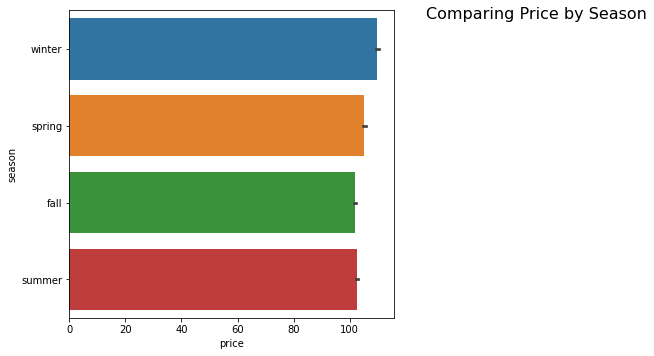

           price                                                        
           count        mean         std  min   25%   50%    75%     max
season                                                                  
fall    221025.0  101.918095  100.647659  9.0  58.0  79.0  110.0  4939.0
spring  278893.0  105.215108  113.678203  9.0  60.0  80.0  119.0  3006.0
summer  244442.0  102.619464   97.074372  9.0  58.0  80.0  115.0  2500.0
winter  243065.0  109.896184  117.665404  9.0  60.0  82.0  120.0  3000.0


In [ ]:
entire_home = airbnb_berlin[airbnb_berlin['room'] == 'Entire home/apt']

barplot_comparison(entire_home,
                   'season',
                   ['price'])

This prepares the "3 or more bedroom" category.
---



In [ ]:
#This will replace 0 bedroom with 'studio'
entire_home['bedrooms'] = entire_home['bedrooms'].replace([0], 'studio')
#This code will let us see only for options for the entire home category
entire_home['bedrooms'] = entire_home['bedrooms'].replace([3,4, 5, 6, 7, 8, 9, 12], '3+ bedrooms')
three_or_more_bd_property = entire_home[entire_home['bedrooms'] == '3+ bedrooms']
print(entire_home['bedrooms'].unique())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[1.0 2.0 '3+ bedrooms' 'studio' nan]


This will describe the information on the mean average price of a 'one bedroom' apartment/house to rent on average.
---



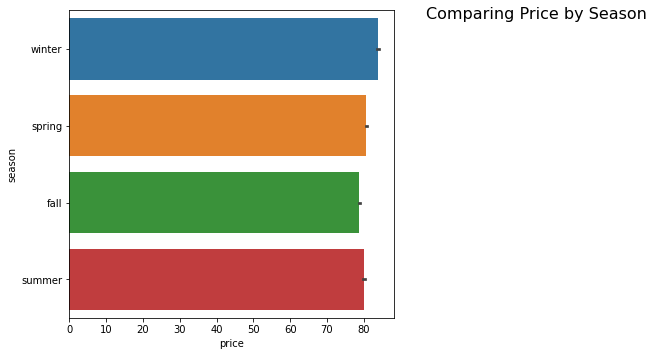

           price                                                     
           count       mean        std   min   25%   50%   75%    max
season                                                               
fall    119677.0  78.845384  45.143240  10.0  53.0  70.0  91.0  999.0
spring  148516.0  80.726393  44.029770  17.0  55.0  70.0  95.0  650.0
summer  133483.0  79.979578  44.930040  10.0  54.0  70.0  95.0  650.0
winter  126601.0  83.818098  48.655396  17.0  56.0  75.0  99.0  999.0




NameError: ignored

In [ ]:
one_bd_property = entire_home[entire_home['bedrooms'] == 1.0]
one_bd_property.describe()

barplot_comparison(one_bd_property, 
                   'season',
                   ['price'])

one_bd_property_spring = one_bd_property[one_bd_property['season'] == 'spring']
one_bd_property_summer = one_bd_property[one_bd_property['season'] == 'summer']
one_bd_property_fall = one_bd_property[one_bd_property['season'] == 'fall']
one_bd_property_winter = one_bd_property[one_bd_property['season'] == 'winter']


print('\n')
print('This shows the spring and summer comparison for one bedroom.','\n' , get_95_ci(one_bd_property_spring['price'], one_bd_property_summer['price']))
print('The t-test results are as follows:')
print(stats.ttest_ind(one_bd_property_spring['price'], one_bd_property_summer['price']))
print('\n')
print('This shows the fall and summer comparison for one bedroom.','\n' , get_95_ci(one_bd_property_summer['price'], one_bd_property_fall['price']))
print('The t-test results are as follows:')
print(stats.ttest_ind(one_bd_property_summer['price'], one_bd_property_fall['price']))
print('\n')
print('This shows the winter and summer comparison for one bedroom.','\n' , get_95_ci(one_bd_property_summer['price'], one_bd_property_winter['price']))
print('The t-test results are as follows:')
stats.ttest_ind(one_bd_property_summer['price'], one_bd_property_winter['price'])

In [ ]:
from scipy.stats import zscore

z_scores = zscore(one_bd_property)
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))




TypeError: ignored

This will describe the information on the mean average price of a '3 or more bedroom' apartment/house to rent on average.
---



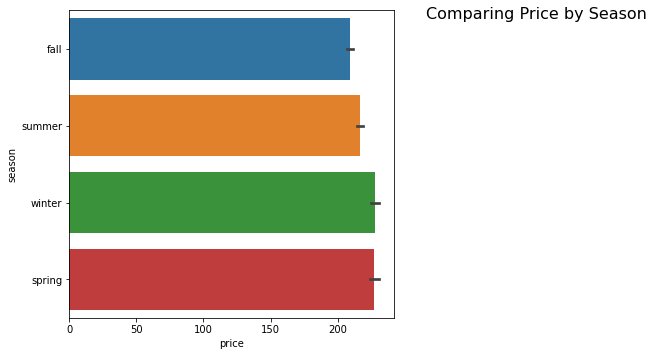

          price                                                          
          count        mean         std  min    25%    50%    75%     max
season                                                                   
fall    20636.0  209.439281  160.103703  9.0  115.0  165.0  260.0  2000.0
spring  27407.0  227.322618  253.625684  9.0  119.0  172.0  260.0  3006.0
summer  22939.0  216.424299  177.166327  9.0  117.0  170.0  270.0  2500.0
winter  24705.0  227.843473  213.590910  9.0  120.0  180.0  260.0  3000.0


This shows the spring and summer comparison for 3 or more bedrooms. 
 The difference in means at the 95% confidence interval (two-tail) is between -14.676284449536531 and -7.120353712068997.
The t-test results are as follows:
Ttest_indResult(statistic=5.483903549638739, pvalue=4.180367617449808e-08)


This shows the fall and summer comparison for 3 or more bedrooms. 
 The difference in means at the 95% confidence interval (two-tail) is between -10.151786288243205 and -3.81825

Ttest_indResult(statistic=-6.325165841167568, pvalue=2.551991421504419e-10)

In [ ]:
barplot_comparison(three_or_more_bd_property, 
                   'season',
                   ['price'])

three_or_more_bd_property_spring = three_or_more_bd_property[three_or_more_bd_property['season'] == 'spring']
three_or_more_bd_property_summer = three_or_more_bd_property[three_or_more_bd_property['season'] == 'summer']
three_or_more_bd_property_fall = three_or_more_bd_property[three_or_more_bd_property['season'] == 'fall']
three_or_more_bd_property_winter = three_or_more_bd_property[three_or_more_bd_property['season'] == 'winter']


print('\n')
print('This shows the spring and summer comparison for 3 or more bedrooms.','\n' , get_95_ci(three_or_more_bd_property_spring['price'], three_or_more_bd_property_summer['price']))
print('The t-test results are as follows:')
print(stats.ttest_ind(three_or_more_bd_property_spring['price'], three_or_more_bd_property_summer['price']))
print('\n')
print('This shows the fall and summer comparison for 3 or more bedrooms.','\n' , get_95_ci(three_or_more_bd_property_summer['price'], three_or_more_bd_property_fall['price']))
print('The t-test results are as follows:')
print(stats.ttest_ind(three_or_more_bd_property_summer['price'], three_or_more_bd_property_fall['price']))
print('\n')
print('This shows the winter and summer comparison for 3 or more bedrooms.','\n' , get_95_ci(three_or_more_bd_property_summer['price'], three_or_more_bd_property_winter['price']))
print('The t-test results are as follows:')
stats.ttest_ind(three_or_more_bd_property_summer['price'], three_or_more_bd_property_winter['price'])

<h2>
This is a bar graph further showing the visualization of vacancy throughout the year, so as to assess the busiest time of year to travel. 
<br>
*   0 = Available dates total count
<br>
*   1 = Booked dates total count
</h2>


Text(0.5, 1.05, '0 = Units Available    ~    1 = Booked Units')

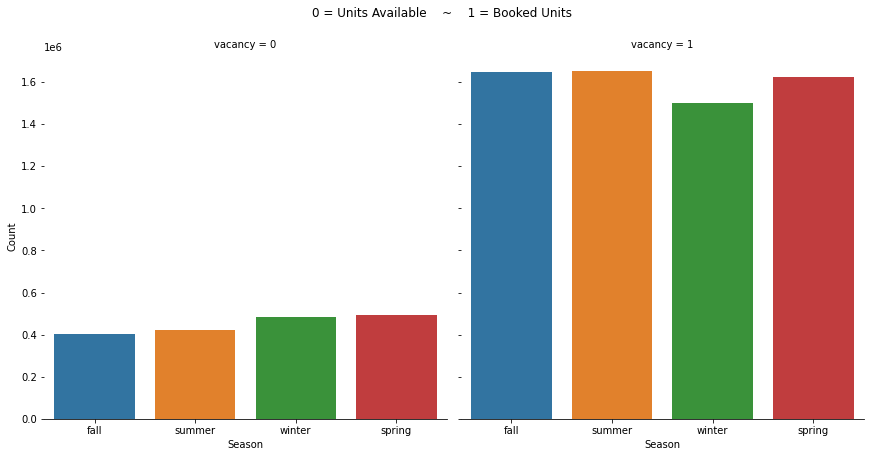

In [ ]:
g = sns.catplot(x="season", col="vacancy",
                data=airbnb_copy, kind="count",
                height=6, aspect=1, legend=True)
(g.set_axis_labels("Season", "Count")
  .despine(left=True))
g.fig.suptitle('0 = Units Available    ~    1 = Booked Units', 
               y=1.05)

<h1> Conclusion </h1>


Although there are multiple variables in this dataset, the focus will be strictly on 'entire home - 1 bedroom' and 'entire home - 3+ bedrooms'. 
This is the "Entire Home" category for summer and spring. After reviewing the data it would appear as though there is sufficient evidence to reject the null hypothesis because the p-values are as follows:
*   This shows the spring and summer comparison for one bedroom is: 8.43e-06
*   This shows the fall and summer comparison for one bedroom. 2.50e-10
*   This shows the winter and summer comparison for one bedroom. 4.96e-97

As for the '3 or more bedroom' column the p-values are as follows:
*   This shows the spring and summer comparison for 4 or more bedrooms: 4.18e-08
*   This shows the fall and summer comparison for 4 or more bedrooms: 1.70e-5
*   This shows the winter and summer comparison for 4 or more bedrooms: 2.55e-10

This means there is a significant difference in travel prices between spring and summer, summer and fall, and summer and winter, and summer is NOT the most expensive season to travel. As the data shows, in these categories the alternative hypothesis is true. The data shows that there is a positive skew of distribution, as there max value is above $8,000.

The average price for a one bedroom is around 80 dollars, with the highest mean occuring during Spring. This means that the time of year when most people travel the most seems to be the Spring, and secondly winter. 

As for the '3 or more bedroom' group, the highest average mean pricing occurs in the Spring and Summer. 

If anyone wanted to travel to Berlin, the busiest time of year is Summer and Fall, and Spring is the 3rd busiest time. I would advise them to book their travel early if they plan on visiting in Fall, as this appears to have the least amount of available units on average. If they are booking only a one bedroom, then pricing is roughly similar year round with Winter having the highest average price overall, whereas 3 or more bedroom can fluxuate based on the season with Winter and Spring being the highest on average.